Import common package

In [2]:
import os
import json
import xarray as xr
import numpy as np
import matplotlib as plt
from datetime import datetime


Import Homemade package

In [3]:
from qcat.utility.file_structure import *
from qcat.utility.io_translator import *
# from analysis.analysis_method import *


Format convert ( LiteVNA )

In [9]:
from qcat.utility.file_structure import create_subfolder


raw_data_fd = r"D:\Data\resonator\5Q4C\raw"
output_fd = r"D:\Data\resonator\5Q4C\fit_data_pd"
# Get all resonator from folder
resonator_list = [d for d in os.listdir(raw_data_fd) if os.path.isdir(os.path.join(raw_data_fd, d))]

print(resonator_list)

for resonator_label in resonator_list:

    print(f"{resonator_label}")
    resonator_fd = f"{raw_data_fd}\\{resonator_label}"
    power_list = [d for d in os.listdir(resonator_fd) if os.path.isdir(os.path.join(resonator_fd, d))]

    create_subfolder(output_fd,resonator_label)
    ave_resonator_folder = f"{output_fd}\\{resonator_label}" 

    for power_label in power_list:

        # print(f"{resonator_label} {power_label}")

        power_fd = f"{resonator_fd}\\{power_label}"
        file_list = [d for d in os.listdir(power_fd) ]
        file_number = len(file_list)
        print( f"{file_number} files in {power_label}" )
        
        same_power_data = []
        
        for i, f_name in enumerate(file_list):

            # Read data
            # print(f"{i+1}/{file_number} {f_name}")
            file_fullpath = f"{power_fd}\\{f_name}"
            dataset = xr.open_dataset(file_fullpath)

            # Parse the time strings back to datetime objects
            start_time = datetime.strptime(dataset.attrs["start_time"], "%Y%m%d_%H%M%S")
            end_time = datetime.strptime(dataset.attrs["end_time"], "%Y%m%d_%H%M%S")
            if i==0: 
                start_time_all = start_time
                end_time_all = end_time
            if start_time < start_time_all : start_time_all = start_time
            if end_time > end_time_all : end_time_all = end_time_all


            power = dataset.attrs["power"]
            # attenuation = dataset.attrs["attenuation"]
            attenuation = 105

            frequency = dataset.coords["frequency"]
            same_power_data.append(dataset["s21"].values)

        print(same_power_data)
        same_power_data = np.array(same_power_data)
        print(same_power_data.ndim)
        if same_power_data.ndim == 3:
            ave_data = np.mean( np.array(same_power_data), axis=0 )
        else:
            ave_data = same_power_data
        print(ave_data)
        # Creating an xarray dataset
        output_data = {
            "s21": ( ["s_params","frequency"],
                    np.array([ave_data[0], ave_data[1]]) )
        }
        dataset = xr.Dataset(
            output_data,
            coords={ "s_params":np.array(["real","imag"]), "frequency": frequency })

        dataset.attrs["power"] = power
        dataset.attrs["attenuation"] = int(attenuation)
        dataset.attrs["start_time"] = str(start_time.strftime("%Y%m%d_%H%M%S"))
        dataset.attrs["end_time"] = str(end_time.strftime("%Y%m%d_%H%M%S"))
        # print(dataset)
        dataset.to_netcdf(f"{ave_resonator_folder}\\liteVNA_{str(attenuation)}_{str(power)}.nc")


['q4']
q4
Create subfolder D:\Data\resonator\5Q4C\fit_data_pd/q4 in result!
1 files in att75_-10.0
[array([[ 0.68481117,  0.68079942,  0.67781246, ..., -0.06361797,
        -0.07106441, -0.07883551],
       [-0.08817481, -0.09712232, -0.10704836, ..., -0.59804106,
        -0.59656805, -0.59386593]])]
3
[[ 0.68481117  0.68079942  0.67781246 ... -0.06361797 -0.07106441
  -0.07883551]
 [-0.08817481 -0.09712232 -0.10704836 ... -0.59804106 -0.59656805
  -0.59386593]]
1 files in att75_-15.0
[array([[ 0.71280253,  0.71589583,  0.71317267, ..., -0.04742174,
        -0.05483162, -0.06315026],
       [-0.01678279, -0.03091585, -0.03981747, ..., -0.60961747,
        -0.60691011, -0.60503221]])]
3
[[ 0.71280253  0.71589583  0.71317267 ... -0.04742174 -0.05483162
  -0.06315026]
 [-0.01678279 -0.03091585 -0.03981747 ... -0.60961747 -0.60691011
  -0.60503221]]
1 files in att75_-20.0
[array([[ 0.74337071,  0.74202204,  0.74653238, ..., -0.04090155,
        -0.05011871, -0.06031263],
       [ 0.0589710

Format convert ( QM )

In [62]:
from qcat.utility.file_structure import create_subfolder


raw_data_fd = r"d:\Data\resonator\5Q4C"
output_fd = r"d:\Data\resonator\5Q4C\fit_data_pd\q4_min"
# Get all resonator from folder
# resonator_list = [d for d in os.listdir(raw_data_fd) if os.path.isdir(os.path.join(raw_data_fd, d))]

f_name = "20240626_1504_power_dep_resonator_q4_ro_min.nc"
freq_ref = 5900 -166.6+10+1.36-1.11+1.49-3.38
ro_name = "q4_ro"

# Read data
# print(f"{i+1}/{file_number} {f_name}")
file_fullpath = f"{raw_data_fd}\\{f_name}"
dataset = xr.open_dataset(file_fullpath)
# dataset = dataset.transpose( "amp_ratio", "mixer", "frequency" )
print( dataset )
# Parse the time strings back to datetime objects
start_time = datetime.strptime(dataset.attrs["start_time"], "%Y%m%d_%H%M%S")
end_time = datetime.strptime(dataset.attrs["end_time"], "%Y%m%d_%H%M%S")
amp_ratio = dataset.coords["amp_ratio"].values
print(amp_ratio)
power_list = 0 +20*np.log10(amp_ratio)
attenuation = 0
print(power_list)
ave_data = dataset[ro_name].values

frequency = (dataset.coords["frequency"].values +freq_ref)*1e6
print( frequency )

temp_idx = ( 100, -100 )
for i, power_label in enumerate(power_list):

    print(power_label)
    # Creating an xarray dataset
    output_data = {
        "s21": ( ["s_params","frequency"],
                np.array([ave_data[0][i][temp_idx[0]:temp_idx[1]], ave_data[1][i][temp_idx[0]:temp_idx[1]]]) )
    }
    output_dataset = xr.Dataset(
        output_data,
        coords={ "s_params":np.array(["real","imag"]), "frequency": frequency[temp_idx[0]:temp_idx[1]] })

    output_dataset.attrs["power"] = power_label
    output_dataset.attrs["attenuation"] = int(attenuation)
    output_dataset.attrs["start_time"] = str(start_time.strftime("%m%d_%H%M%S"))
    output_dataset.attrs["end_time"] = str(end_time.strftime("%m%d_%H%M%S"))
    # print(dataset)
    output_dataset.to_netcdf(f"{output_fd}\\QM_{str(attenuation)}_{power_label:.1f}.nc")



<xarray.Dataset>
Dimensions:    (frequency: 500, amp_ratio: 36, mixer: 2)
Coordinates:
  * frequency  (frequency) float64 -25.0 -24.9 -24.8 -24.7 ... 24.7 24.8 24.9
  * amp_ratio  (amp_ratio) float64 0.1 0.15 0.2 0.25 0.3 ... 1.7 1.75 1.8 1.85
  * mixer      (mixer) object 'I' 'Q'
Data variables:
    q4_ro      (mixer, amp_ratio, frequency) float64 ...
Attributes:
    start_time:  20240626_150352
    end_time:    20240626_150418
[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4  1.45
 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85]
[-2.00000000e+01 -1.64781748e+01 -1.39794001e+01 -1.20411998e+01
 -1.04575749e+01 -9.11863911e+00 -7.95880017e+00 -6.93574972e+00
 -6.02059991e+00 -5.19274621e+00 -4.43697499e+00 -3.74173287e+00
 -3.09803920e+00 -2.49877473e+00 -1.93820026e+00 -1.41162149e+00
 -9.15149811e-01 -4.45527894e-01  3.85730987e-15  4.23785981e-01
  8.27853703e-01  1.21395681e+00  1.58362492e+00  1.938200

Format convert ( PYQUM )

In [35]:
from qcat.utility.file_structure import create_subfolder


raw_data_fd = r"D:\Data\resonator\ITRI_364_scalinQ\raw"
output_fd = r"d:\Data\resonator\ITRI_364_scalinQ_new\fit_data_pd"
# Get all resonator from folder
resonator_list = [d for d in os.listdir(raw_data_fd) if os.path.isdir(os.path.join(raw_data_fd, d))]

print(resonator_list)

for resonator_label in resonator_list:

    print(f"{resonator_label}")
    resonator_fd = f"{raw_data_fd}\\{resonator_label}"
    power_list = [d for d in os.listdir(resonator_fd) if os.path.isdir(os.path.join(resonator_fd, d))]

    create_subfolder(output_fd,resonator_label)
    ave_resonator_folder = f"{output_fd}\\{resonator_label}" 

    mat_files = check_file_extension( resonator_fd, "mat")
    df_config = pd.read_json(f'{resonator_fd}\\config.json')
    for index, row in df_config.iterrows():
        attenuation = row["attenuation"]
        file_name = row["file_name"]
        print(f"{file_name} with {attenuation} dB attenuation")
        power_list, frequency, s21 = mat_to_numpy(f"{resonator_fd}\\{file_name}")
        print(frequency[0])
        zdata_2d = s21.transpose()
        for i, power_label in enumerate(power_list):
            # print(power_label)
            data = zdata_2d[i]


            # Creating an xarray dataset
            output_data = {
                "s21": ( ["s_params","frequency"],
                        np.array([data.real, data.imag]) )
            }
            dataset = xr.Dataset(
                output_data,
                coords={ "s_params":np.array(["real","imag"]), "frequency": frequency*1e9 })
            
            dataset.attrs["attenuation"] = int(attenuation)
            dataset.attrs["power"] = power_label
            dataset.to_netcdf(f"{ave_resonator_folder}\\PYQUM_{str(attenuation)}_{str(power_label)}.nc")


['C45505', 'C46277', 'C49069', 'C49936', 'C51595', 'C52463', 'C53941', 'C54826']
C45505
C45505_0_20.mat with 75 dB attenuation
4.55037
C45505_30_1.mat with 105 dB attenuation
4.55037
C46277
C46277_0_20.mat with 75 dB attenuation
4.62755
C46277_30_1.mat with 105 dB attenuation
4.62755
C49069
C49069_0_20.mat with 75 dB attenuation
4.90681
C49069_30_1.mat with 105 dB attenuation
4.90681
C49936
C49936_0_20.mat with 75 dB attenuation
4.99358
C49936_30_1.mat with 105 dB attenuation
4.99358
C51595
C51595_0_20.mat with 75 dB attenuation
5.15951
C51595_30_1.mat with 105 dB attenuation
5.15951
C52463
C52463_0_20.mat with 75 dB attenuation
5.24625
C52463_30_1.mat with 105 dB attenuation
5.24625
C53941
C53941_0_20.mat with 75 dB attenuation
5.39405
C53941_30_1.mat with 105 dB attenuation
5.39405
C54826
C54826_0_20.mat with 75 dB attenuation
5.48255
C54826_30_1.mat with 105 dB attenuation
5.48255


Start Analysis

Processing q0
D:\Data\resonator\5Q4C\fit_data_pd\q0
q0 start free analysis
0 th
1 th
2 th
3 th
4 th
5 th
6 th
7 th
8 th
9 th
10 th
Saving plot at D:\Data\resonator\5Q4C\fit_result\q0/q0_free.png
delay: 6.440e-08,
amp_norm: 7.612e-01,
Qc: 6.546e+03,
alpha: -6.264e-01
Saving plot at D:\Data\resonator\5Q4C\fit_result\q0/q0_refined.png
Processing q1
D:\Data\resonator\5Q4C\fit_data_pd\q1
q1 start free analysis
0 th
1 th


c:\Users\shiau\.conda\envs\PYQUM-server-offline\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


2 th
3 th
4 th
5 th
6 th
7 th
8 th
9 th
10 th
Saving plot at D:\Data\resonator\5Q4C\fit_result\q1/q1_free.png
delay: 6.445e-08,
amp_norm: 5.497e-01,
Qc: 4.370e+03,
alpha: -3.194e-01
Saving plot at D:\Data\resonator\5Q4C\fit_result\q1/q1_refined.png
Processing q2
D:\Data\resonator\5Q4C\fit_data_pd\q2
q2 start free analysis
0 th
1 th
2 th
3 th
4 th
5 th


c:\Users\shiau\.conda\envs\PYQUM-server-offline\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


6 th
7 th
8 th
9 th
10 th
Saving plot at D:\Data\resonator\5Q4C\fit_result\q2/q2_free.png
delay: 6.534e-08,
amp_norm: 6.580e-01,
Qc: 1.940e+03,
alpha: -1.018e+00
Saving plot at D:\Data\resonator\5Q4C\fit_result\q2/q2_refined.png
Processing q3
D:\Data\resonator\5Q4C\fit_data_pd\q3
q3 start free analysis
0 th
1 th
2 th
3 th
4 th
5 th
6 th
7 th
8 th
9 th
10 th
Saving plot at D:\Data\resonator\5Q4C\fit_result\q3/q3_free.png
delay: 6.458e-08,
amp_norm: 5.261e-01,
Qc: 2.154e+03,
alpha: -1.364e+00
Saving plot at D:\Data\resonator\5Q4C\fit_result\q3/q3_refined.png
Processing q4
D:\Data\resonator\5Q4C\fit_data_pd\q4
q4 start free analysis
0 th
1 th
2 th
3 th
4 th
5 th
6 th
7 th
8 th
9 th
10 th
Saving plot at D:\Data\resonator\5Q4C\fit_result\q4/q4_free.png
delay: 6.794e-08,
amp_norm: 7.324e-01,
Qc: 1.385e+03,
alpha: -9.731e-01
Saving plot at D:\Data\resonator\5Q4C\fit_result\q4/q4_refined.png


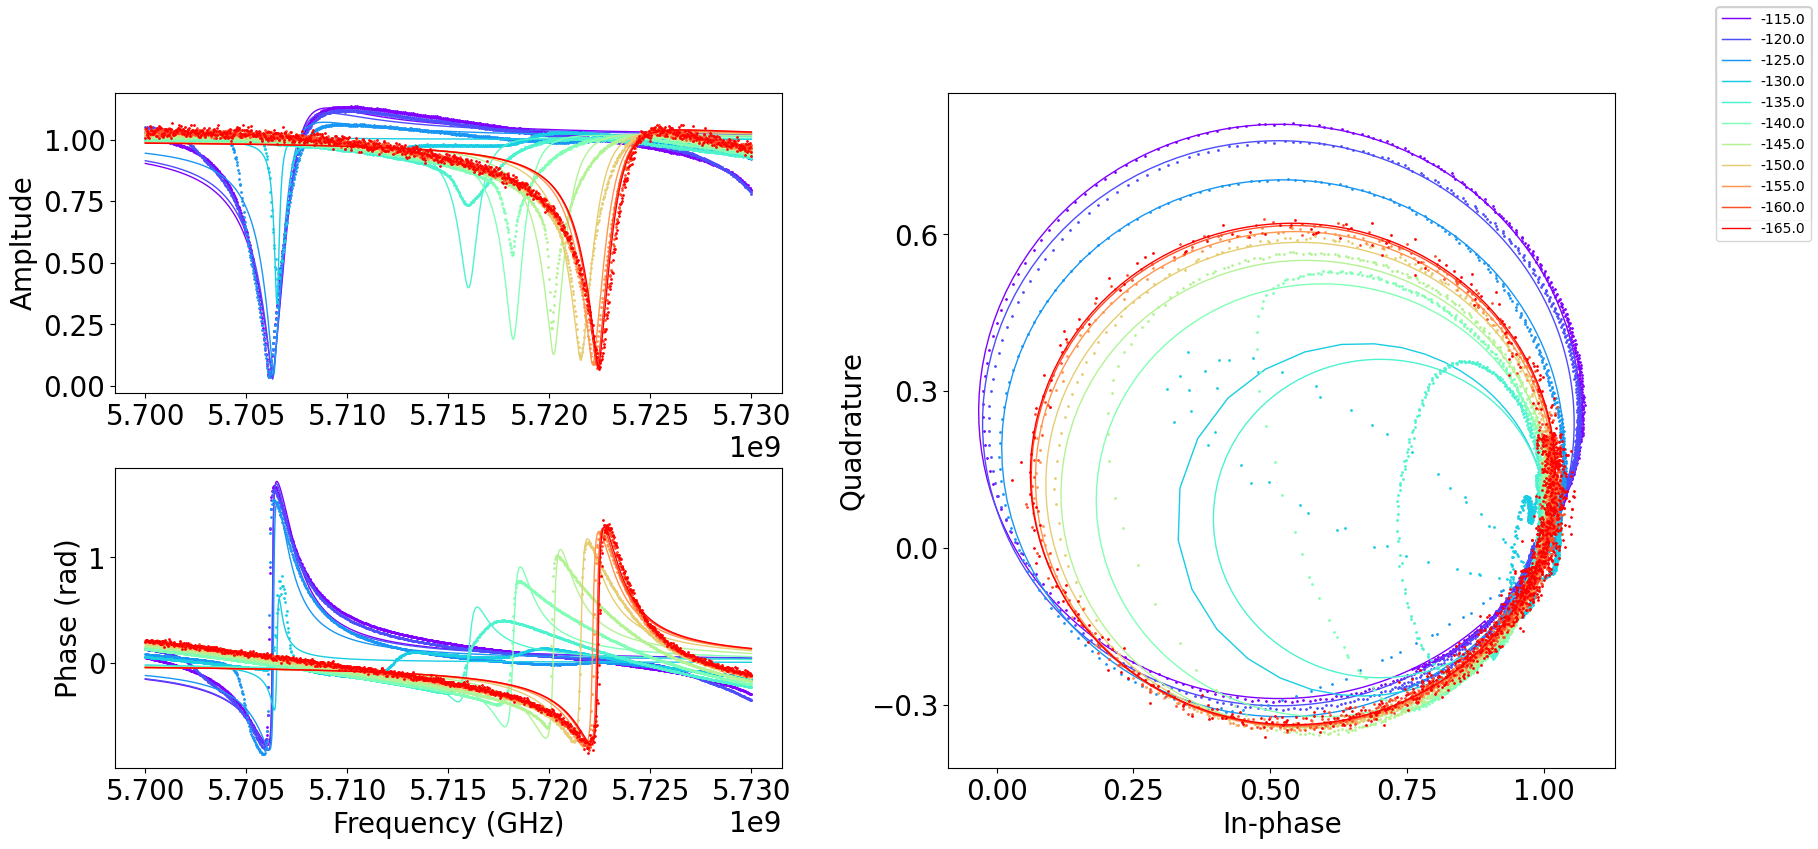

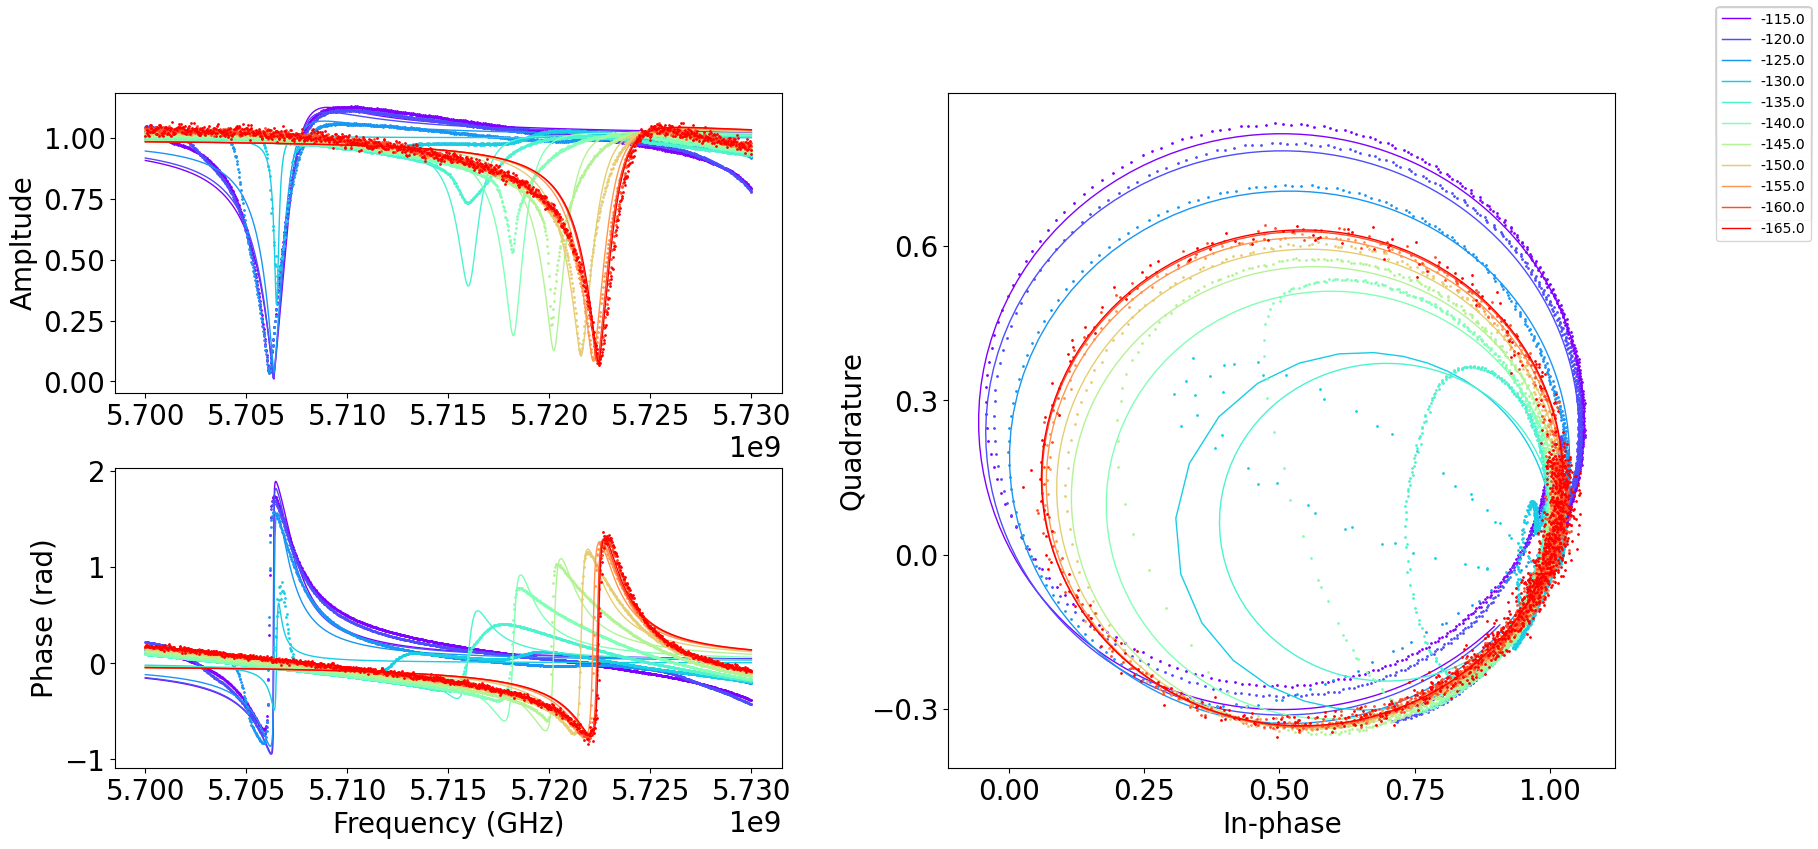

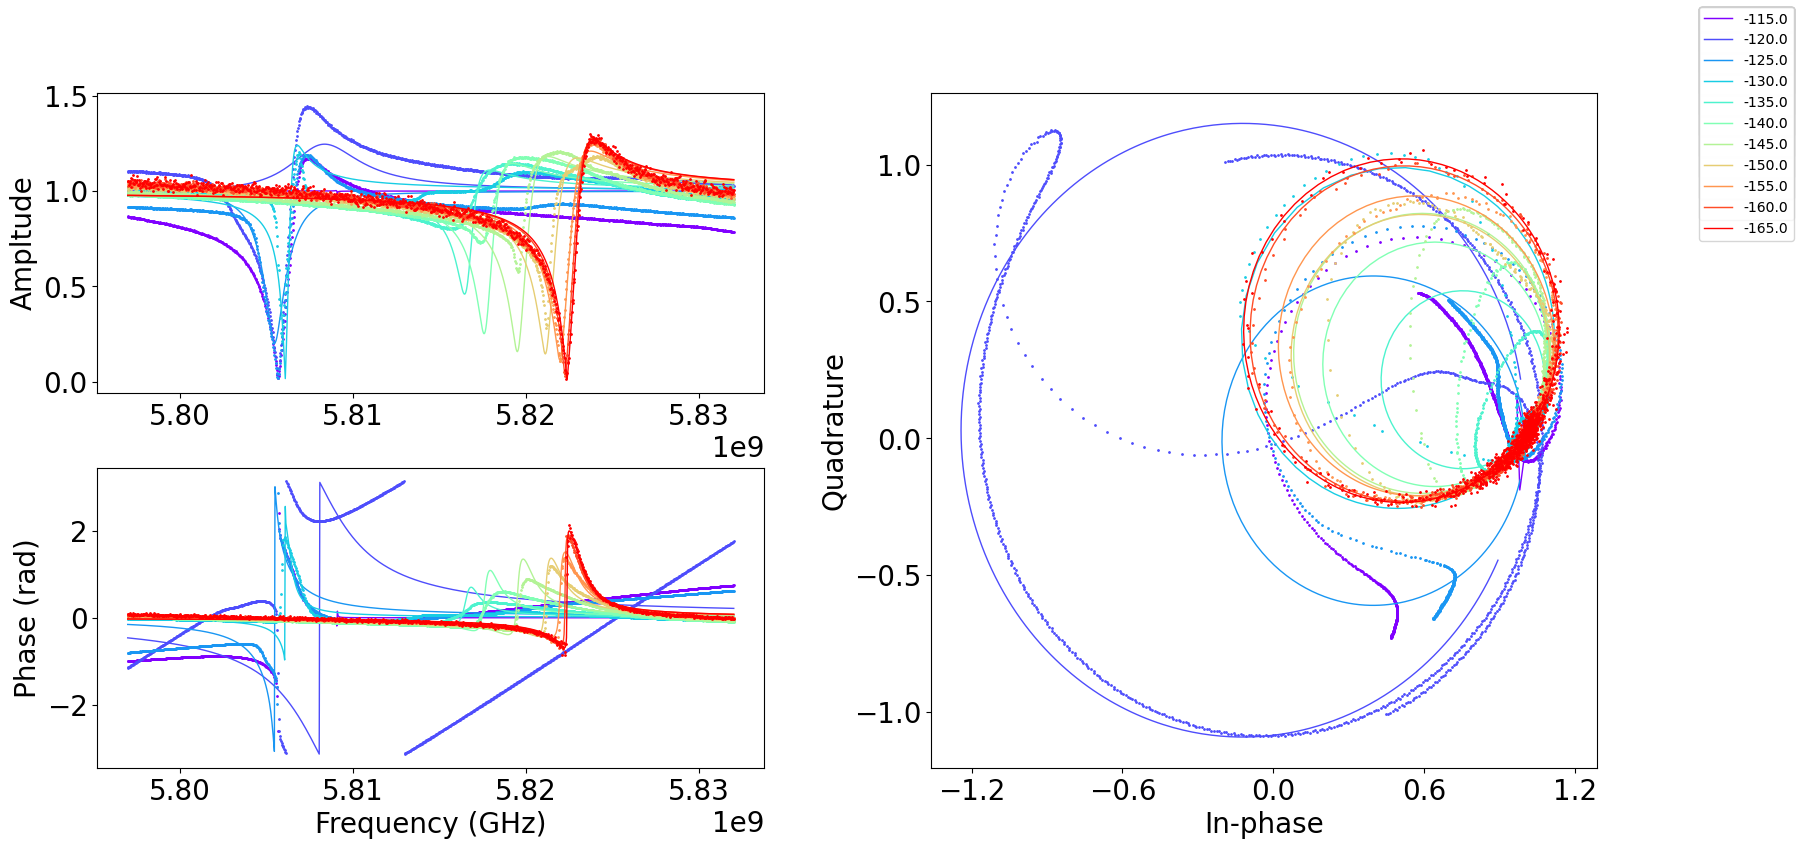

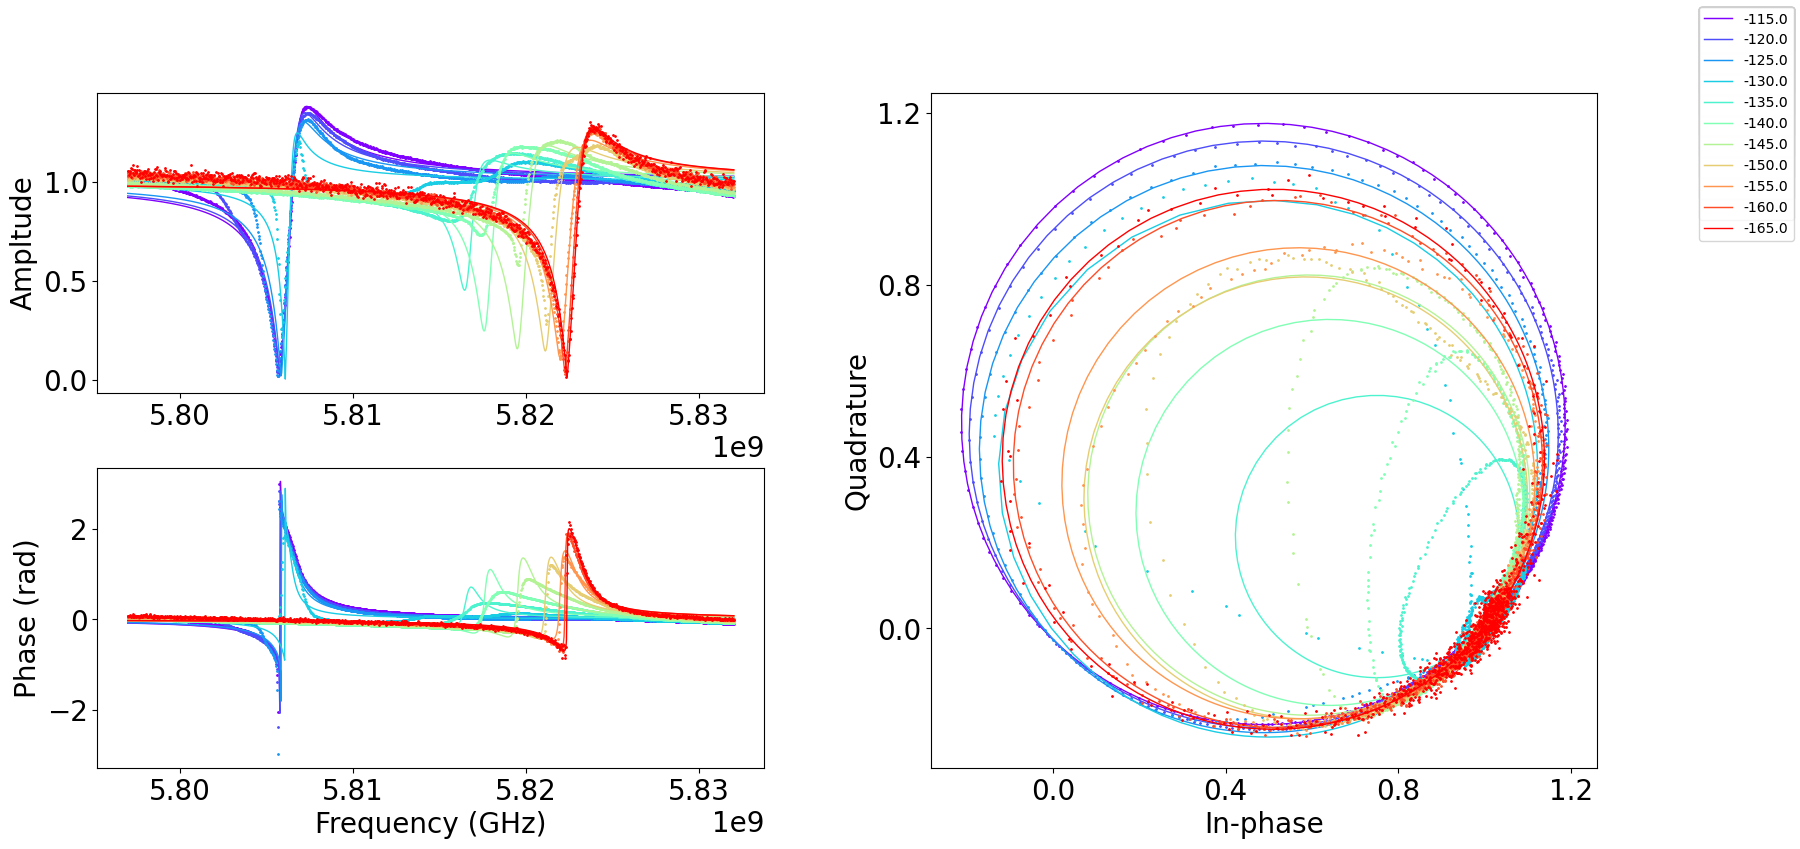

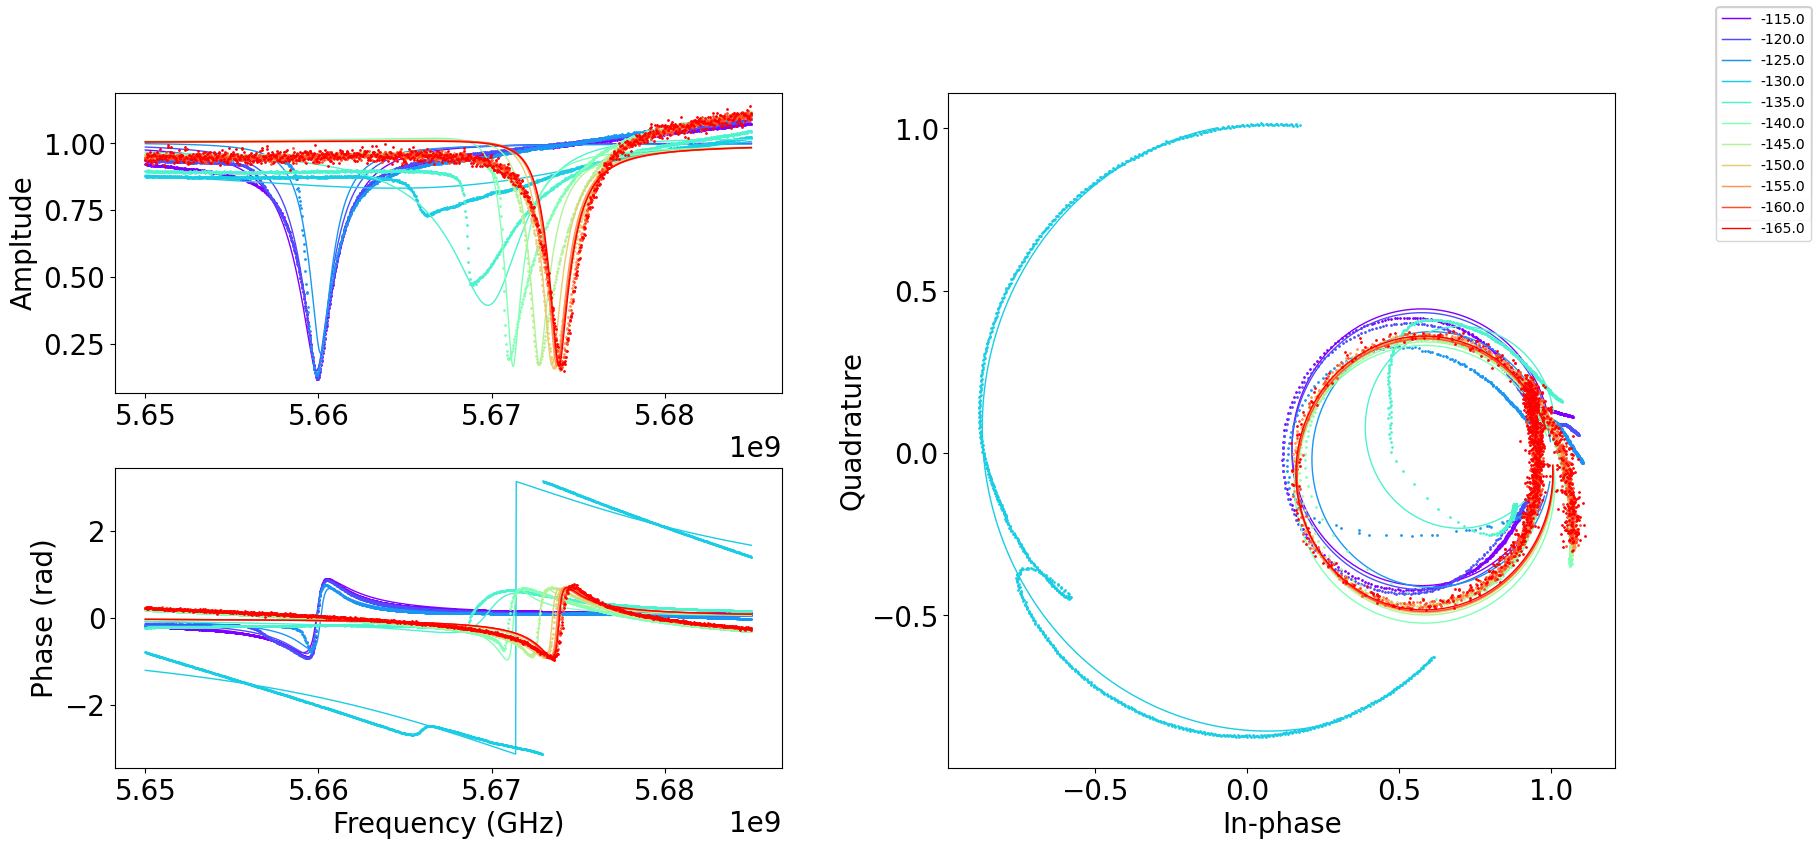

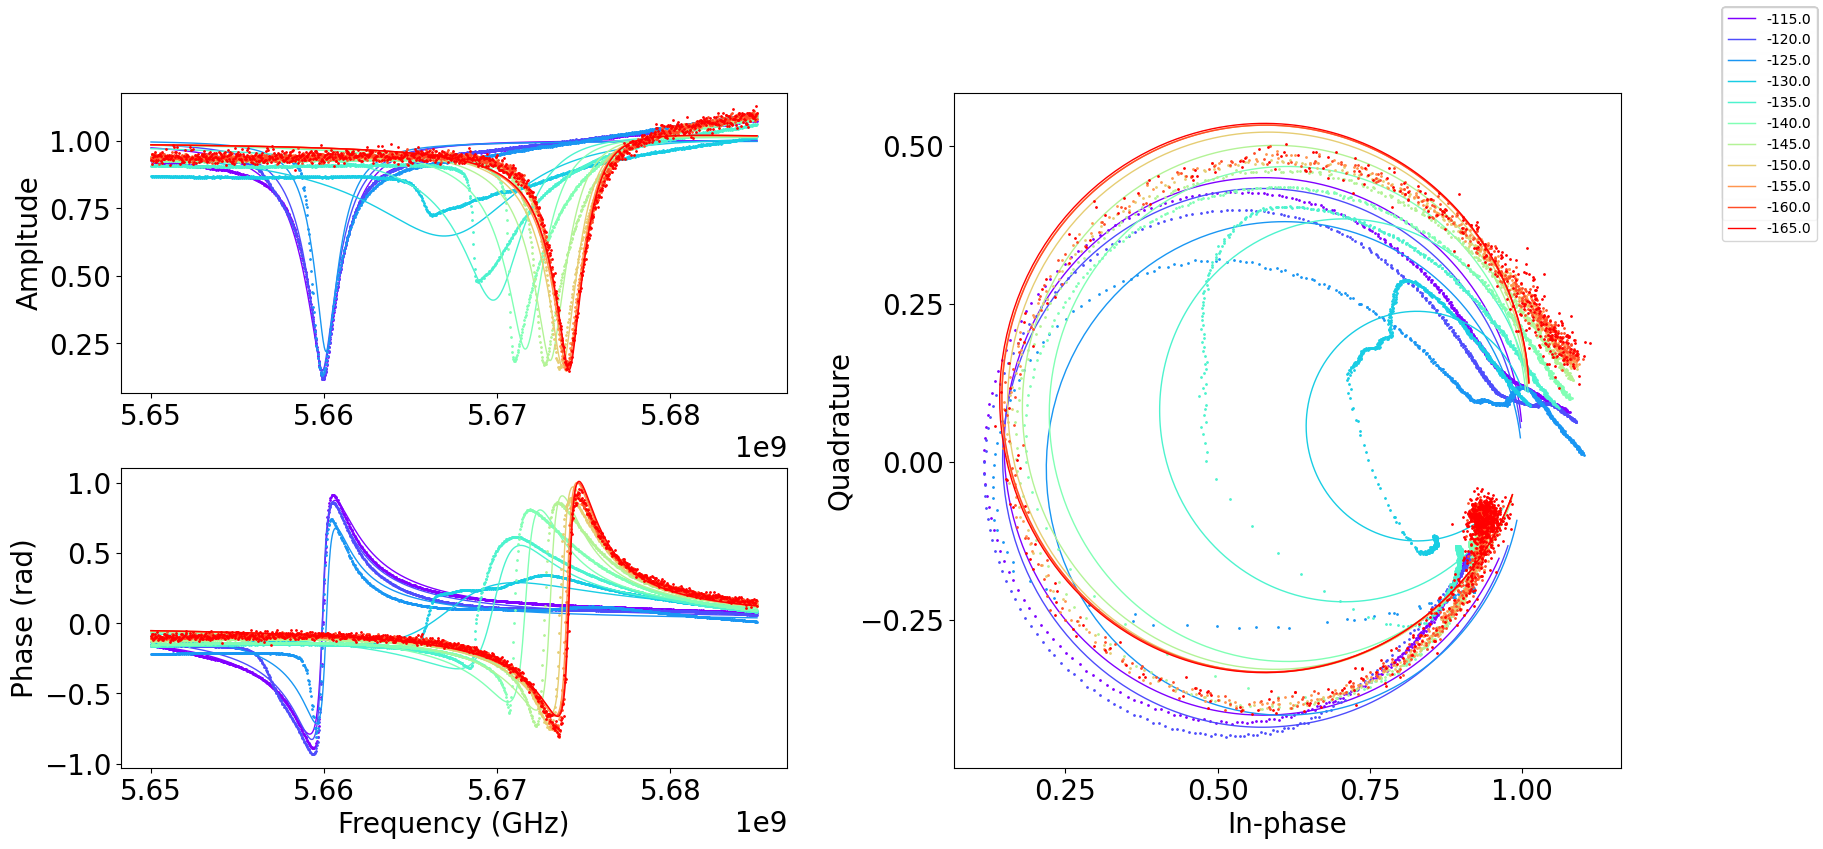

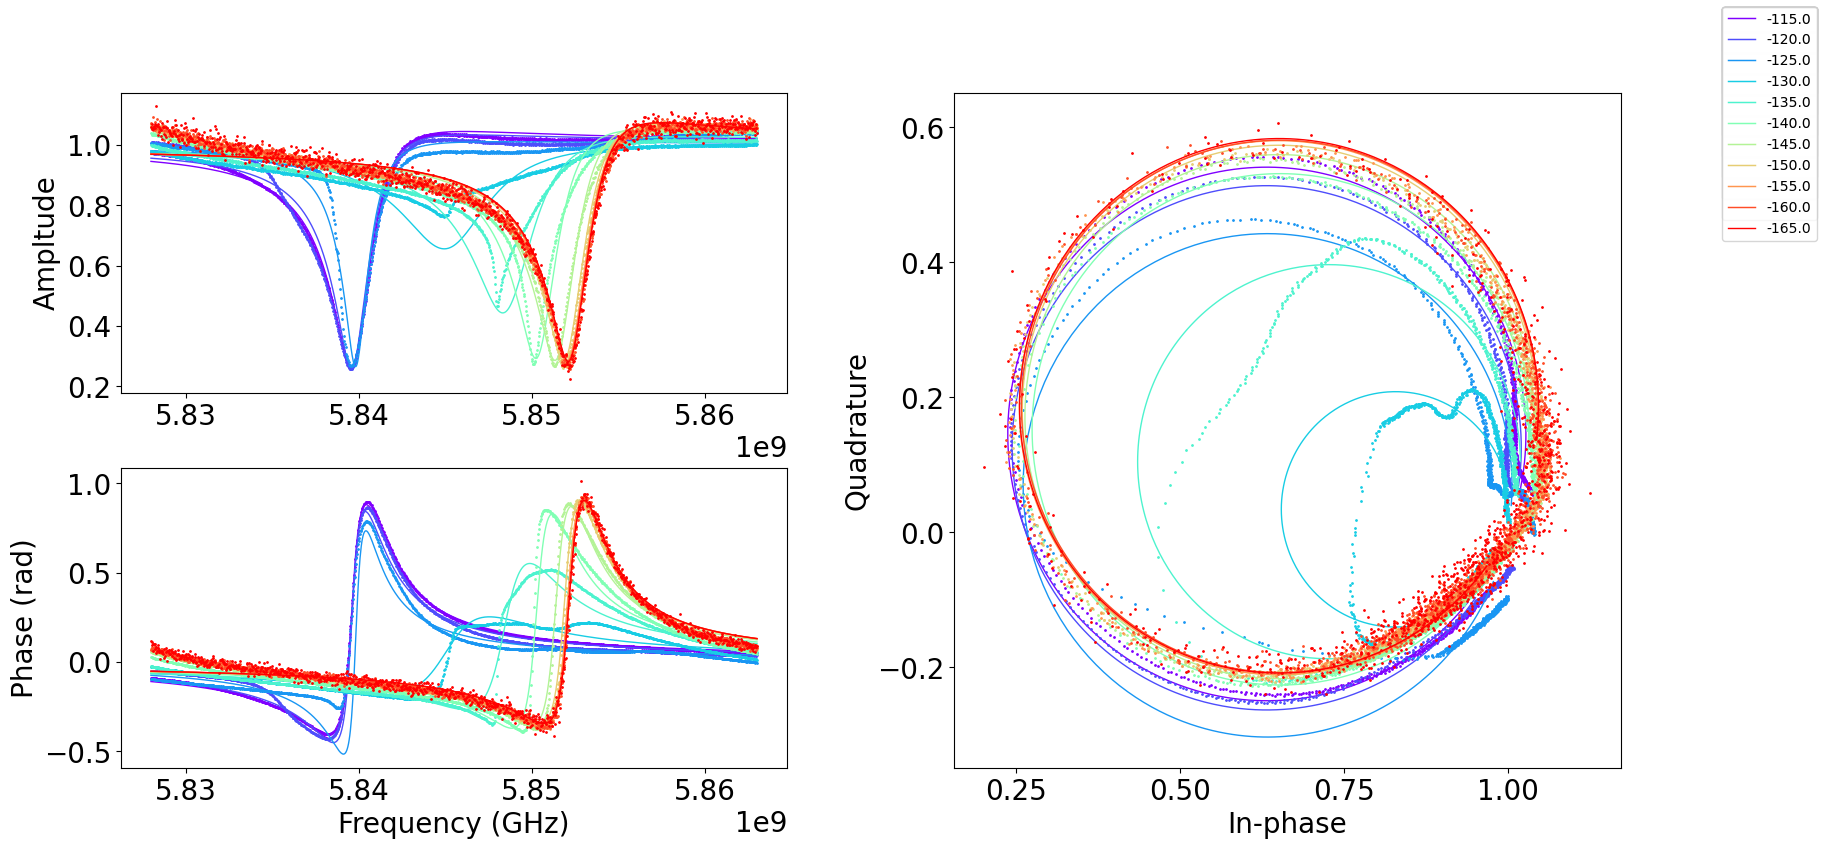

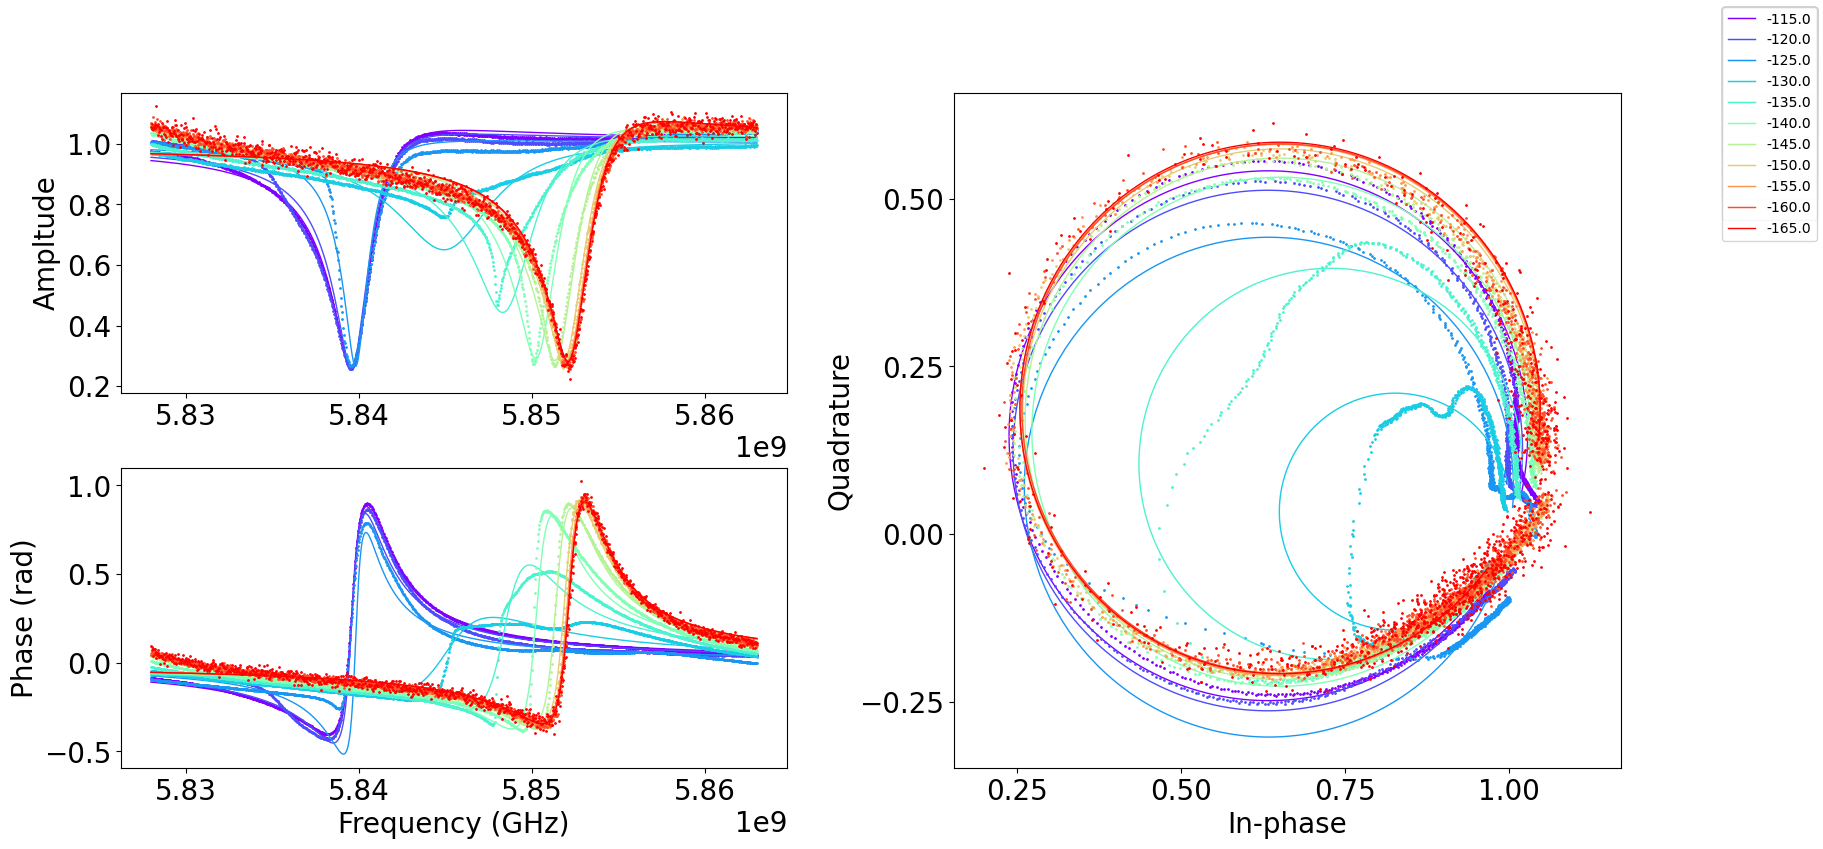

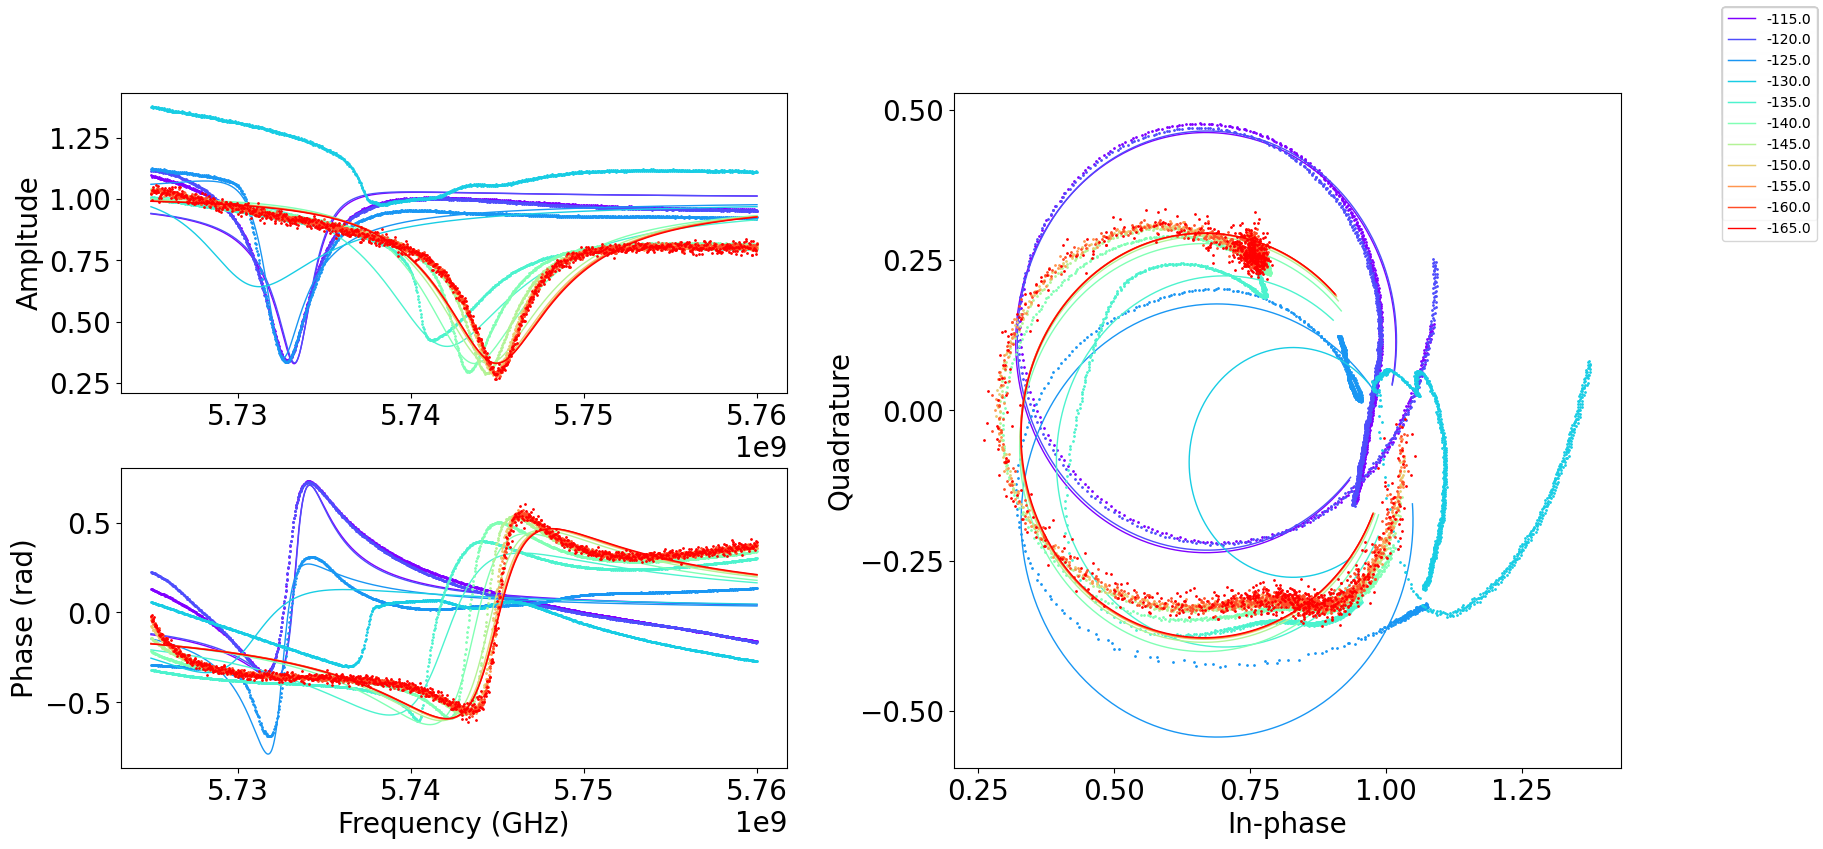

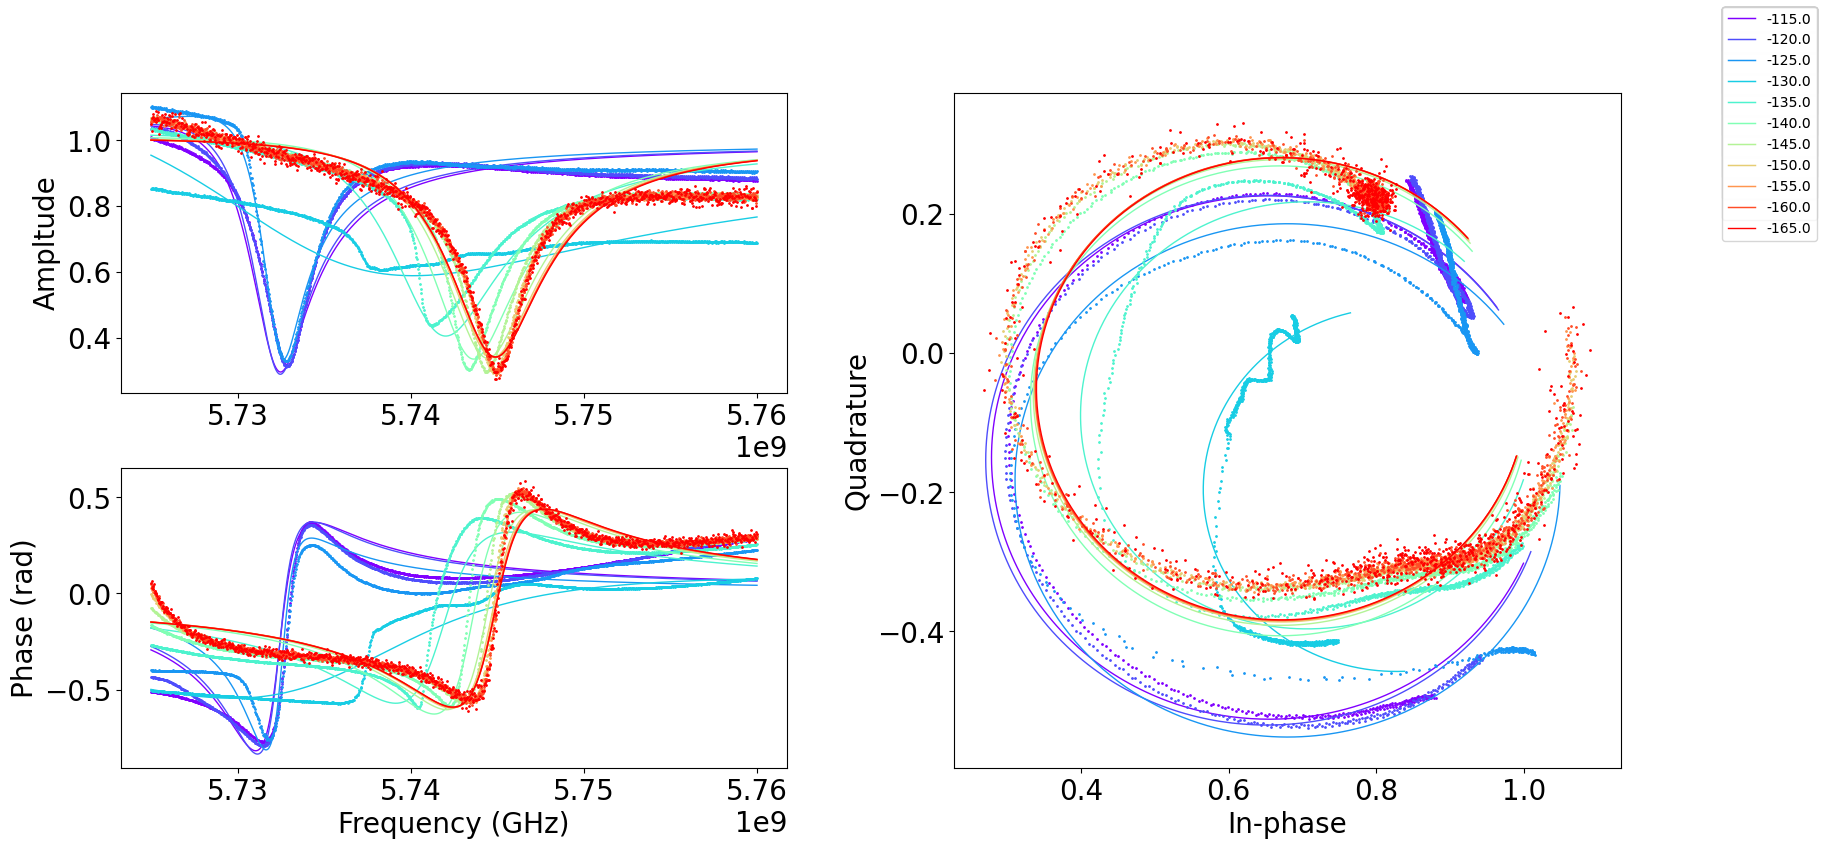

In [11]:
from qcat.analysis.resonator.photon_dep.res_data import *
from qcat.utility.file_structure import check_file_extension, create_subfolder


raw_data_fd = r"D:\Data\resonator\5Q4C\fit_data_pd"
output_fd = r"D:\Data\resonator\5Q4C\fit_result"
# Get all resonator from folder
resonator_list = [d for d in os.listdir(raw_data_fd) if os.path.isdir(os.path.join(raw_data_fd, d))]

# check_configure(f"{output_fd}", ["power_dep_fit"])

all_resonator_result = []

for resonator_label in resonator_list:
    print(f"Processing {resonator_label}")

    create_subfolder(output_fd,resonator_label)
    result_folder = f"{output_fd}\\{resonator_label}"

    resonator_data_folder = f"{raw_data_fd}\\{resonator_label}"
    resonator = PhotonDepResonator(resonator_label)
    # Find cavity data (nc file) in the folder
    file_list = check_file_extension( resonator_data_folder, "nc")
    print(resonator_data_folder)

    for f_name in file_list:
        dataset = xr.open_dataset(f"{resonator_data_folder}\\{f_name}")
        power = dataset.attrs["power"]
        attenuation = dataset.attrs["attenuation"]
        frequency = dataset.coords["frequency"].values
        data = dataset["s21"].values
        resonator.import_array(frequency, data[0]+1j*data[1], power-attenuation)
    result = resonator.refined_analysis( result_folder )
    # result = resonator.free_analysis( result_folder )

    all_resonator_result.append( result )
    
    df_results = pd.concat(all_resonator_result)
    df_results.Name = resonator_label



Plot

In [12]:

plot_data_fd = r"D:\Data\resonator\5Q4C\fit_result"
output_fd = r"D:\Data\resonator\5Q4C\fit_result"
from qcat.visualization.photon_dep_loss import * 
all_resonator_result = []
folder_list = [d for d in os.listdir(raw_data_fd) if os.path.isdir(os.path.join(raw_data_fd, d))]

fr = []
qc = []
for resonator_label in folder_list:
    create_subfolder(output_fd,resonator_label)
    result_folder = f"{output_fd}\\{resonator_label}"

    # Plotting
    df_powerQ_free = pd.read_csv( f"{plot_data_fd}\\{resonator_label}\\free_result.csv" )
    plot_singleRes_powerQ_free(df_powerQ_free, cav_label=f"{resonator_label}", output_fd=result_folder)
    plot_singleRes_powerloss_free(df_powerQ_free, cav_label=f"{resonator_label}", output_fd=result_folder)

    df_powerQ_refined = pd.read_csv( f"{plot_data_fd}\\{resonator_label}\\refined_result.csv" )
    plot_singleRes_powerQ_refined(df_powerQ_refined, cav_label=f"{resonator_label}", output_fd=result_folder)
    plot_singleRes_powerloss_refined(df_powerQ_refined, cav_label=f"{resonator_label}", output_fd=result_folder)
    fr.append(df_powerQ_refined["fr"].values[-1])
    qc.append(df_powerQ_refined["Qc_dia_corr_fixed"].values[-1])



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

ploting q0
ploting q1
ploting q2
ploting q3
ploting q4
ploting q0
ploting q1
ploting q2
ploting q3
ploting q4
ploting q0
ploting q1
ploting q2
ploting q3
ploting q4
ploting q0
ploting q1
ploting q2
ploting q3
ploting q4
ploting q0
ploting q1
ploting q2
ploting q3
ploting q4
ploting q0
ploting q1
ploting q2
ploting q3
ploting q4


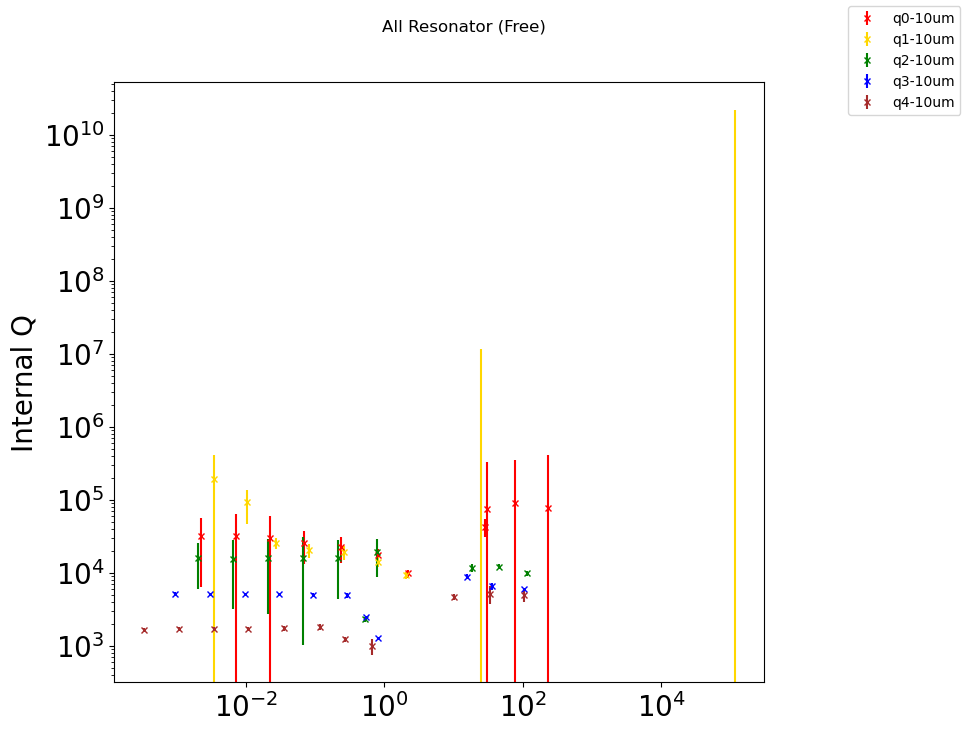

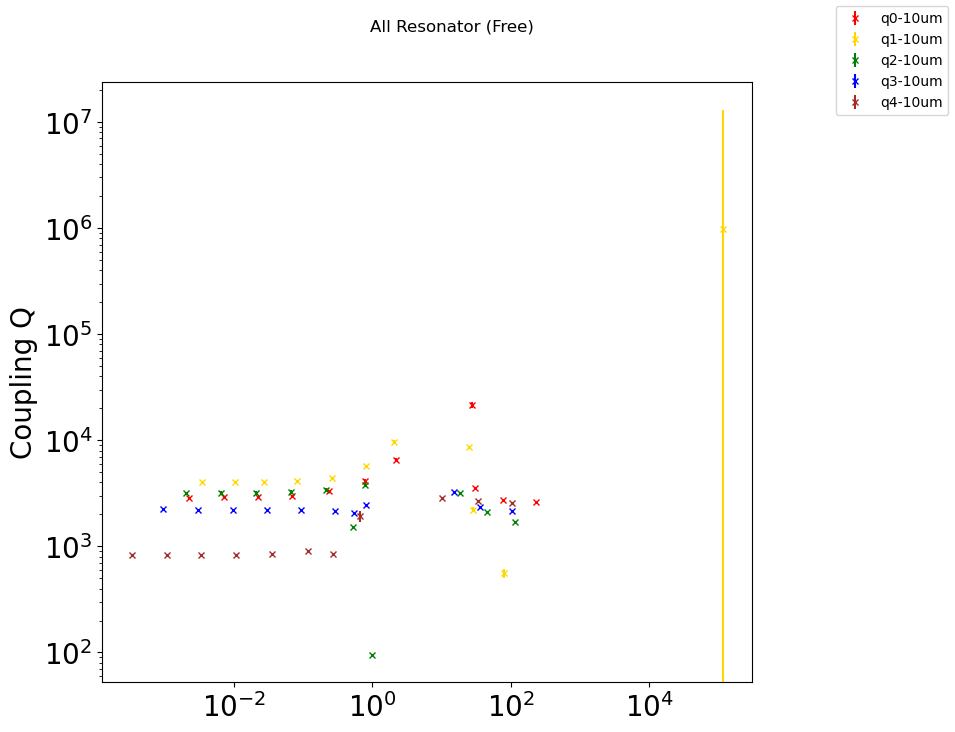

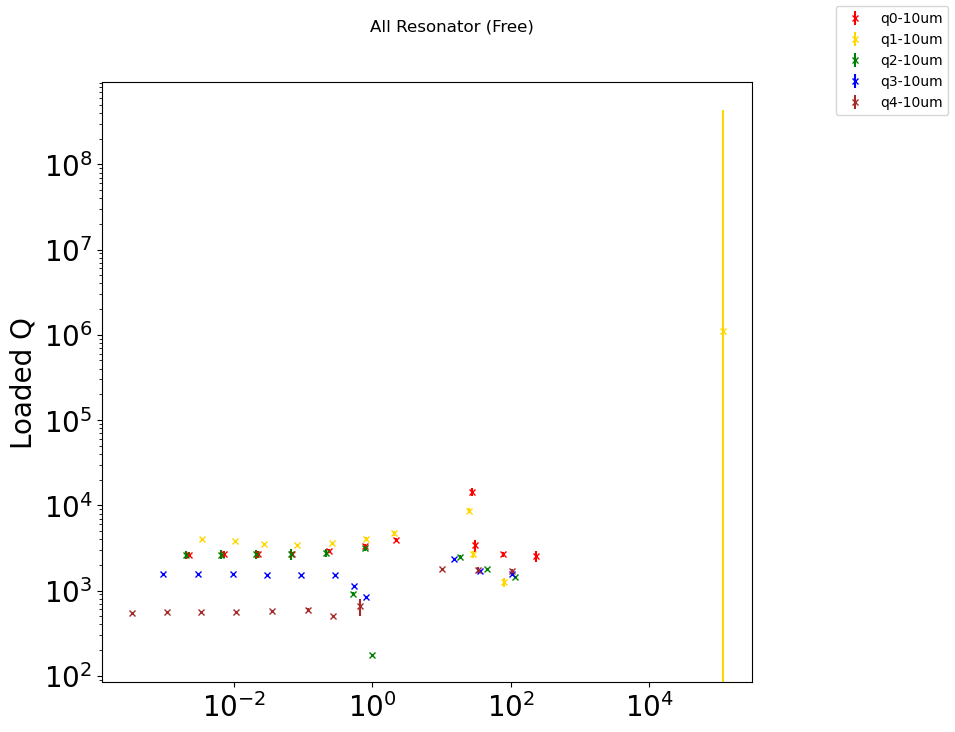

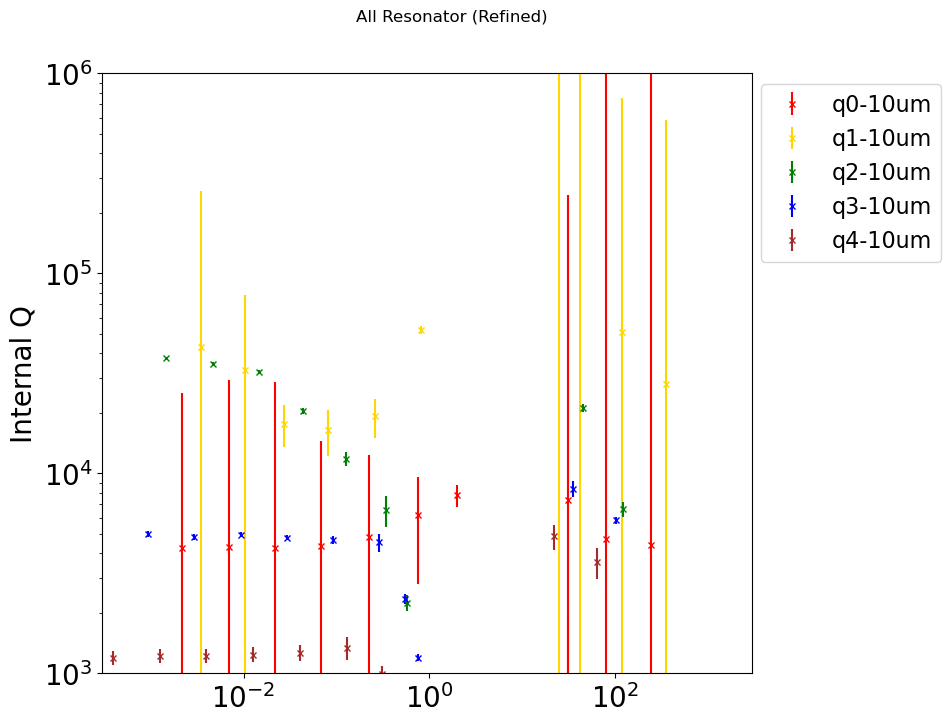

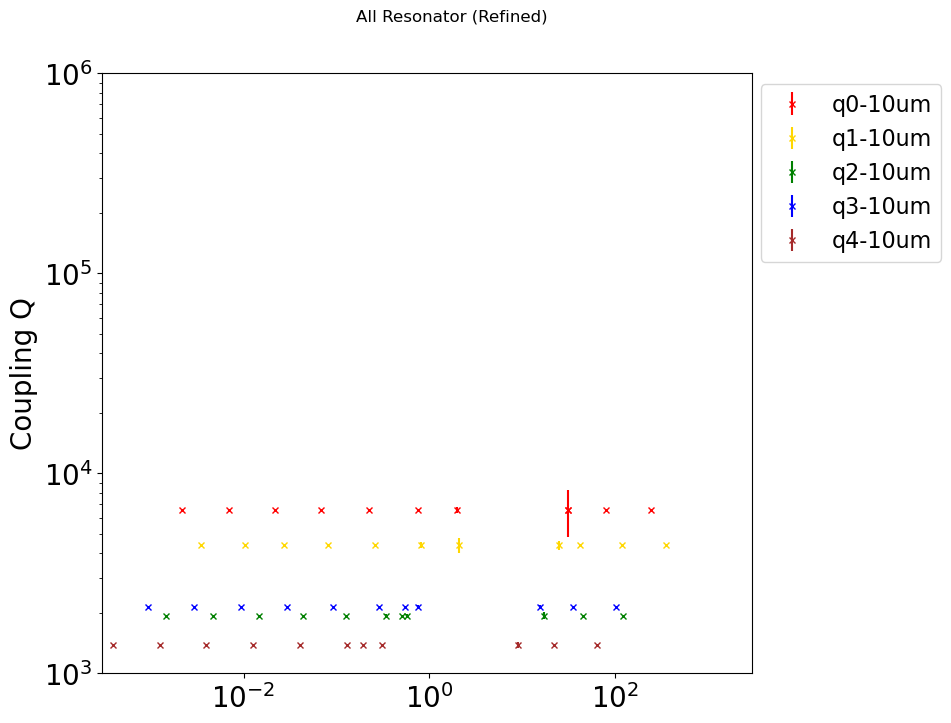

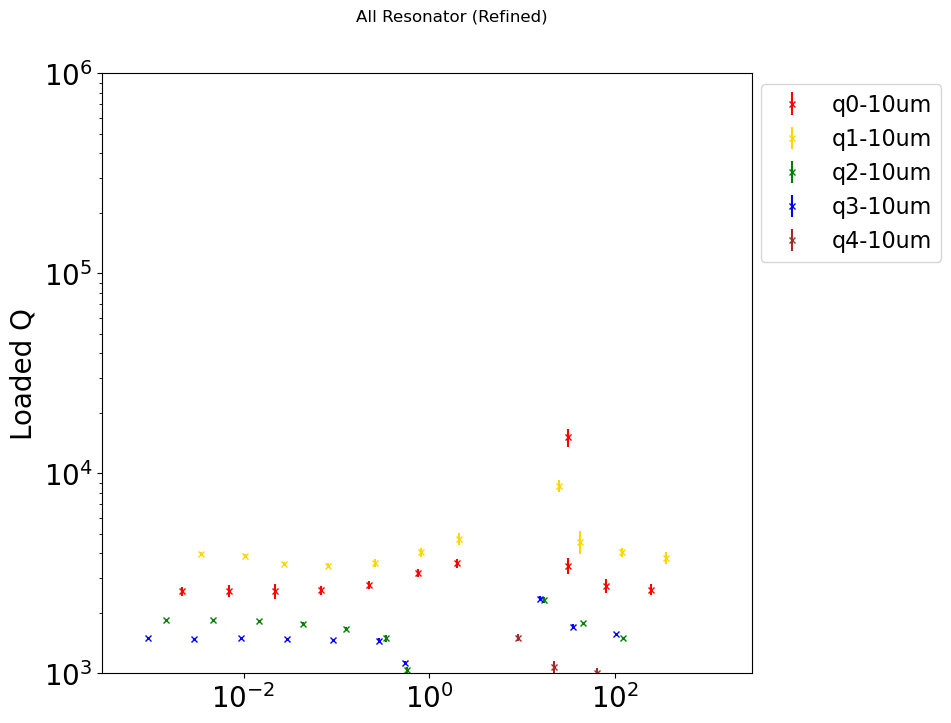

In [18]:
## After assignment each cavity, get foward analysis
assignment = pd.read_json(r"d:\Data\resonator\5Q4C\fit_result\assignment.json")
plot_multiRes_powerQ_free( output_fd, assignment, output_fd)
plot_multiRes_powerQ_refined( output_fd, assignment, output_fd,((3e-4,3e3),(1e3,1e6)) )
# ((3e-1,3e5),(1e5,5e6))
pd.DataFrame({"fr":np.array(fr),"Qc":np.array(qc)}).to_csv( f"{output_fd}/Qc.csv" )